<a href="https://colab.research.google.com/github/dinhtiendat2k3/btvn/blob/main/bu%E1%BB%95i_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pyreadr

In [ ]:
import pandas as pd

In [ ]:
dataframe = pyreadr.read_r('/content/births2006.smpl.rda')

In [ ]:
dataframe = data['births2006.smpl']

In [ ]:
print(dataframe.head(5))

   DOB_MM  DOB_WK  MAGER TBO_REC WTGAIN SEX APGAR5                  DMEDUC  \
0       9       1     25       2    NaN   F    NaN                    NULL   
1       2       6     28       2     26   M      9      2 years of college   
2       2       2     18       2     25   F      9                    NULL   
3      10       5     21       2      6   M      9                    NULL   
4       7       7     25       1     36   M     10  2 years of high school   

   UPREVIS  ESTGEST DMETH_REC   DPLURAL  DBWT  
0       10       99   Vaginal  1 Single  3800  
1       10       37   Vaginal  1 Single  3625  
2       14       38   Vaginal  1 Single  3650  
3       22       38   Vaginal  1 Single  3045  
4       15       40   Vaginal  1 Single  3827  


In [ ]:
print(dataframe.columns)

Index(['DOB_MM', 'DOB_WK', 'MAGER', 'TBO_REC', 'WTGAIN', 'SEX', 'APGAR5',
       'DMEDUC', 'UPREVIS', 'ESTGEST', 'DMETH_REC', 'DPLURAL', 'DBWT'],
      dtype='object')


In [ ]:
# Tính tổng số ca sinh cho mỗi phương thức sinh nở và mỗi ngày trong tuần
births_by_method_and_day = dataframe.groupby(['DMETH_REC', 'DOB_WK']).size().reset_index(name='count')

In [ ]:
# In ra kết quả
print(births_by_method_and_day)

    DMETH_REC  DOB_WK  count
0   C-section       1   8836
1   C-section       2  20454
2   C-section       3  22921
3   C-section       4  23103
4   C-section       5  22825
5   C-section       6  23233
6   C-section       7  10696
7     Unknown       1     90
8     Unknown       2    272
9     Unknown       3    247
10    Unknown       4    252
11    Unknown       5    258
12    Unknown       6    289
13    Unknown       7    109
14    Vaginal       1  31348
15    Vaginal       2  42031
16    Vaginal       3  46607
17    Vaginal       4  46935
18    Vaginal       5  47081
19    Vaginal       6  44858
20    Vaginal       7  34878


In [ ]:
# Tính tổng số ca sinh cho mỗi ngày trong tuần
births_by_day_of_week = dataframe.groupby('DOB_WK').size().reset_index(name='count')

# In ra kết quả
print(births_by_day_of_week)

   DOB_WK  count
0       1  40274
1       2  62757
2       3  69775
3       4  70290
4       5  70164
5       6  68380
6       7  45683


In [ ]:
import matplotlib.pyplot as plt

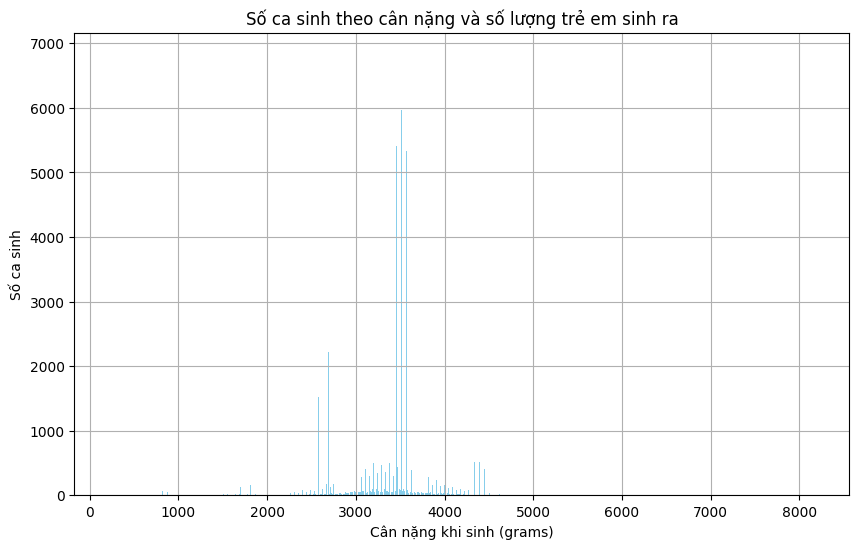

In [ ]:
# Lọc dữ liệu để chỉ bao gồm các cột cần thiết
filtered_data = dataframe[['DPLURAL', 'DBWT']]

# Tính tổng số ca sinh cho mỗi cân nặng và số lượng trẻ em sinh ra
births_by_weight_and_plural = filtered_data.groupby(['DBWT', 'DPLURAL']).size().reset_index(name='count')

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(births_by_weight_and_plural['DBWT'], births_by_weight_and_plural['count'], color='skyblue')
plt.xlabel('Cân nặng khi sinh (grams)')
plt.ylabel('Số ca sinh')
plt.title('Số ca sinh theo cân nặng và số lượng trẻ em sinh ra')
plt.grid(True)
plt.show()

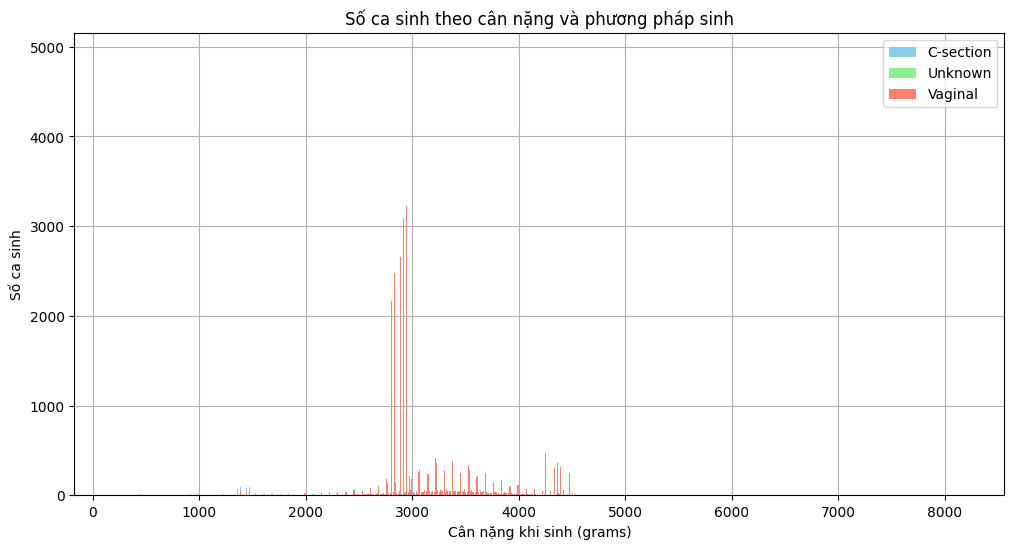

In [ ]:
# Lọc dữ liệu để chỉ bao gồm các cột cần thiết
filtered_data = dataframe[['DMETH_REC', 'DBWT']]

# Tính tổng số ca sinh cho mỗi phương pháp sinh và cân nặng khi sinh
births_by_method_and_weight = filtered_data.groupby(['DMETH_REC', 'DBWT']).size().reset_index(name='count')

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Màu sắc cho mỗi phương pháp sinh
for i, method in enumerate(births_by_method_and_weight['DMETH_REC'].unique()):
    method_data = births_by_method_and_weight[births_by_method_and_weight['DMETH_REC'] == method]
    plt.bar(method_data['DBWT'], method_data['count'], color=colors[i], label=method)

plt.xlabel('Cân nặng khi sinh (grams)')
plt.ylabel('Số ca sinh')
plt.title('Số ca sinh theo cân nặng và phương pháp sinh')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-53-d9f442f5822b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='APGAR5', y='DBWT', data=filtered_data, palette='pastel')


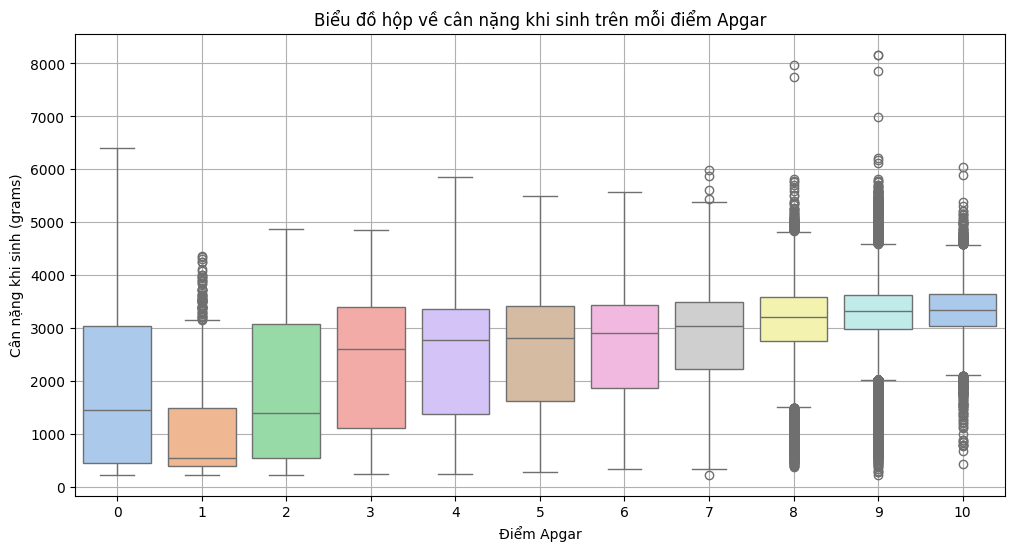

In [ ]:
import seaborn as sns

# Lọc dữ liệu để chỉ bao gồm các cột cần thiết
filtered_data = dataframe[['APGAR5', 'DBWT']]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(x='APGAR5', y='DBWT', data=filtered_data, palette='pastel')
plt.xlabel('Điểm Apgar')
plt.ylabel('Cân nặng khi sinh (grams)')
plt.title('Biểu đồ hộp về cân nặng khi sinh trên mỗi điểm Apgar')
plt.grid(True)
plt.show()

<ipython-input-54-22e0a25a9fcd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DOB_WK', y='DBWT', data=filtered_data, palette='pastel')


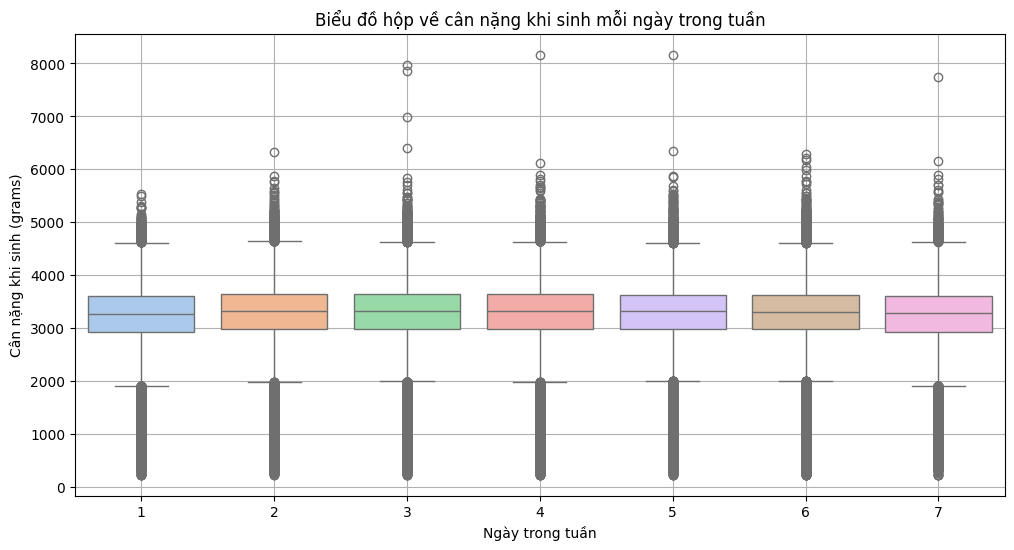

In [ ]:
# Lọc dữ liệu để chỉ bao gồm các cột cần thiết
filtered_data = dataframe[['DOB_WK', 'DBWT']]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(x='DOB_WK', y='DBWT', data=filtered_data, palette='pastel')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Cân nặng khi sinh (grams)')
plt.title('Biểu đồ hộp về cân nặng khi sinh mỗi ngày trong tuần')
plt.grid(True)
plt.show()

In [ ]:
# Lọc dữ liệu để chỉ bao gồm các cột cần thiết
filtered_data = dataframe[['SEX', 'DBWT']]

# Nhóm dữ liệu theo giới tính và tính cân nặng trung bình
average_weight_by_sex = filtered_data.groupby('SEX')['DBWT'].mean()

# In ra kết quả
print("Cân nặng trung bình của trẻ sơ sinh theo giới tính:")
print(average_weight_by_sex)

Cân nặng trung bình của trẻ sơ sinh theo giới tính:
SEX
F    3208.798058
M    3317.990519
Name: DBWT, dtype: object


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
